In [1]:
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults_New/
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
%ls

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/SelectionResults_New
HLFV_110GeV_AdditionalTree.root    HLFV_140GeV_AdditionalTree.root
HLFV_110GeV_SelectionResults.root  HLFV_140GeV_SelectionResults.root
HLFV_115GeV_AdditionalTree.root    HLFV_145GeV_AdditionalTree.root
HLFV_115GeV_SelectionResults.root  HLFV_145GeV_SelectionResults.root
HLFV_120GeV_AdditionalTree.root    ZHTaTa_AdditionalTree.root
HLFV_120GeV_SelectionResults.root  ZHTaTa_SelectionResults.root
HLFV_125GeV_AdditionalTree.root    ZHWW_AdditionalTree.root
HLFV_125GeV_SelectionResults.root  ZHWW_SelectionResults.root
HLFV_130GeV_AdditionalTree.root    ZWW4l_AdditionalTree.root
HLFV_130GeV_SelectionResults.root  ZWW4l_SelectionResults.root
HLFV_135GeV_AdditionalTree.root    ZZTaTa_AdditionalTree.root
HLFV_135GeV_SelectionResults.root  ZZTaTa_SelectionResults.root


In [2]:
# This creates a Python list of strings
file_list = glob.glob('*AdditionalTree.root')

In [3]:
def load_data(file_paths, tree_name):
    """
    Loads data from multiple ROOT files into a dictionary of Akward arrays.
    """
    data = {}
    for name, path in file_paths.items():
        print(f"Loading data from {path}...")
        try:
            with uproot.open(path) as file:
                tree = file[tree_name]
                data[name] = tree.arrays()
        except Exception as e:
            print(f"Error loading {path}: {e}")
            data[name] = None
    return data



file_paths = {}
for file_name in file_list:
    key = file_name.split('_AdditionalTree.root')[0]
    file_paths[key] = file_name


raw_data = load_data(file_paths,"Selection Results")


Loading data from HLFV_130GeV_AdditionalTree.root...
Loading data from ZHTaTa_AdditionalTree.root...
Loading data from HLFV_135GeV_AdditionalTree.root...
Loading data from ZZTaTa_AdditionalTree.root...
Loading data from HLFV_110GeV_AdditionalTree.root...
Loading data from HLFV_140GeV_AdditionalTree.root...
Loading data from ZWW4l_AdditionalTree.root...
Loading data from ZHWW_AdditionalTree.root...
Loading data from HLFV_145GeV_AdditionalTree.root...
Loading data from HLFV_125GeV_AdditionalTree.root...
Loading data from HLFV_120GeV_AdditionalTree.root...
Loading data from HLFV_115GeV_AdditionalTree.root...


In [7]:
# Pass Final Cut Statistics
for key in raw_data.keys():
    total_events = 1000000  # Assuming each dataset has 1 million events
    passed_events = ak.sum(raw_data[key]["Status_08_NotZ_MassThreshold"])
    print(f"{key}: {passed_events} out of {total_events} events passed the final cut.")

HLFV_130GeV: 568789 out of 1000000 events passed the final cut.
ZHTaTa: 18982 out of 1000000 events passed the final cut.
HLFV_135GeV: 566312 out of 1000000 events passed the final cut.
ZZTaTa: 1789 out of 1000000 events passed the final cut.
HLFV_110GeV: 576983 out of 1000000 events passed the final cut.
HLFV_140GeV: 563238 out of 1000000 events passed the final cut.
ZWW4l: 2094 out of 1000000 events passed the final cut.
ZHWW: 6575 out of 1000000 events passed the final cut.
HLFV_145GeV: 559844 out of 1000000 events passed the final cut.
HLFV_125GeV: 570358 out of 1000000 events passed the final cut.
HLFV_120GeV: 572547 out of 1000000 events passed the final cut.
HLFV_115GeV: 575509 out of 1000000 events passed the final cut.


In [87]:
def plot_histogram(plottype, raw_data, cutlevel, yscale, energy_plot, savepdf=False):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    signalType = ["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
    colors=sns.color_palette("flare", len(signalType))
    if energy_plot:
        bins_range = (0, 300)
        bins_num = 60
        xlabel = f"{plottype} [GeV]"
    else:
        bins_range = (0, 6)
        bins_num = 50
        xlabel = plottype
    for i,signal in enumerate(signalType):
        a=raw_data[signal]
        n_arr=a[plottype][a[cutlevel]==1]  # Apply final cut status
        sns.histplot(n_arr, bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                     element="step", alpha=0.7, color=colors[i],
                     stat="count", multiple="layer", label=signal)
    sns.histplot(raw_data['ZHTaTa'][plottype][raw_data['ZHTaTa'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black',
                 stat="count", multiple="layer", label="ZHTaTa")
    sns.histplot(raw_data['ZHWW'][plottype][raw_data['ZHWW'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black', linestyle='dotted',
                 stat="count", multiple="layer", label="ZHWW")
    sns.histplot(raw_data['ZZTaTa'][plottype][raw_data['ZZTaTa'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black', linestyle='dashdot',
                 stat="count", multiple="layer", label="ZZTaTa")
    sns.histplot(raw_data['ZWW4l'][plottype][raw_data['ZWW4l'][cutlevel]==1], bins=bins_num, binrange=bins_range, ax=ax, fill=False,
                 element="step", alpha=0.7, color='black', linestyle='dashed',
                 stat="count", multiple="layer", label="ZWW4l")
    ax.set_title(f"{plottype} for HLFV signals")
    ax.set_xlabel(xlabel)
    ax.set_yscale(yscale)
    ax.set_ylabel("Counts")
    ax.legend()
    if savepdf:
        pdf.savefig()
    else:
        plt.show()
    plt.close()
    # plt.show()

In [41]:
# The CutLevel

# 'Status_00_NonSelection',
# 'Status_01_Lepton_PT',
# 'Status_02_FinalState_4Leptons',
# 'Status_03_Lepton_Odd',
# 'Status_04_Charge_Violation',
# 'Status_05_Z_Window',
# 'Status_06_NotZ_dR',
# 'Status_07_NotZ_MET_dPhi',
# 'Status_08_NotZ_MassThreshold',
#================================================
# The Plotting Variable

# 'NearestZ_Mass',
# 'OtherPair_Mass',
# 'Z_PairIndexSum',
# 'NotZ_dR',
# 'NotZ_dPhi',
# 'NotZ_EleMET_dPhi',
# 'NotZ_MuMET_dPhi'

In [ ]:
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/images
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pypdf import PdfReader, PdfWriter  # pip install pypdf
import os

filename = 'analysis_report.pdf'
bookmark_titles = []
datafields=raw_data["HLFV_110GeV"].fields  # Just to check the available fields in raw_data for
cutlist=[i for i in datafields if "Status" in i]
plotlst=[i for i in datafields if i not in cutlist]
# 1. Initialize the PDF file
with PdfPages(filename) as pdf:
    for plottype in plotlst:
        for cutlevel in cutlist:
            energy_plot = plottype.split('_')[-1] not in ['dR', 'dPhi', 'PairIndexSum']
            plot_histogram(plottype, raw_data, cutlevel, 'linear', energy_plot)
            bookmark_titles.append(f"{plottype} | {cutlevel[7:]}")

# ==========================================
# 3. Post-Processing: Add Bookmarks
# ==========================================
print("Adding bookmarks...")

reader = PdfReader(filename)
writer = PdfWriter()

# Loop through pages and add them to the new writer with bookmarks
for i, page in enumerate(reader.pages):
    writer.add_page(page)
    
    # Add the bookmark (Outline) if we have a title for this page
    if i < len(bookmark_titles):
        writer.add_outline_item(title=bookmark_titles[i], page_number=i)

# Overwrite the file (or save as new)
output_filename = 'analysis_report_with_bookmarks.pdf'
with open(output_filename, "wb") as f:
    writer.write(f)

print(f"Saved: {output_filename}")
%rm analysis_report.pdf

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/HighMassCut/images
Adding bookmarks...
Saved: analysis_report_with_bookmarks.pdf


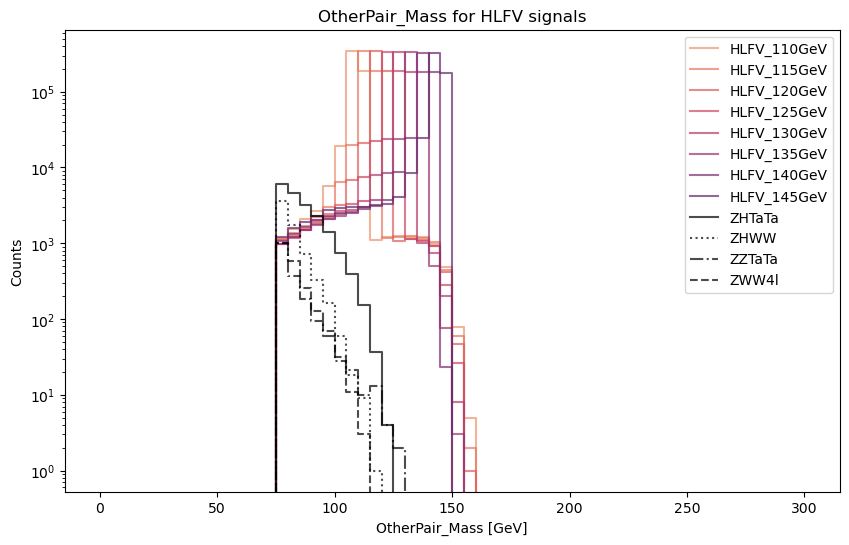

In [88]:
plot_histogram('OtherPair_Mass', raw_data, 'Status_08_NotZ_MassThreshold', 'log', True)

In [91]:
# plot the Chart of Yields after final cut
from turtle import pd


signalType=["HLFV_110GeV","HLFV_115GeV","HLFV_120GeV","HLFV_125GeV","HLFV_130GeV","HLFV_135GeV","HLFV_140GeV","HLFV_145GeV"]
bg_xsec = {
    "ZHTaTa": 2.19e-5,
    "ZHWW": 7.84e-5,
    "ZZTaTa": 1.52e-4,
    "ZWW4l": 2.691e-6
}
for masspoint in signalType:
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 10
    signal_last_cut_mask = raw_data[masspoint]['Status_08_NotZ_MassThreshold'] == 1
    signal_inside_mass_window = (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    signal_final_mask = signal_last_cut_mask & signal_inside_mass_window
    signal_yield_at_1ab = ak.sum(signal_final_mask) * 1e-6  # Since we started with 1 million events
    # Backgrounds in this mass
    
    bg_yields_at_1ab = {}
    for bg in bg_xsec.keys():
        bg_last_cut_mask = raw_data[bg]['Status_08_NotZ_MassThreshold'] == 1
        bg_inside_mass_window = (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        bg_final_mask = bg_last_cut_mask & bg_inside_mass_window
        bg_yield = ak.sum(bg_final_mask) * bg_xsec[bg] # Scale by cross-section
        bg_yields_at_1ab[bg] = bg_yield
    # Plot (dodge) Histrogram for each mass point but signal stacked with bgs


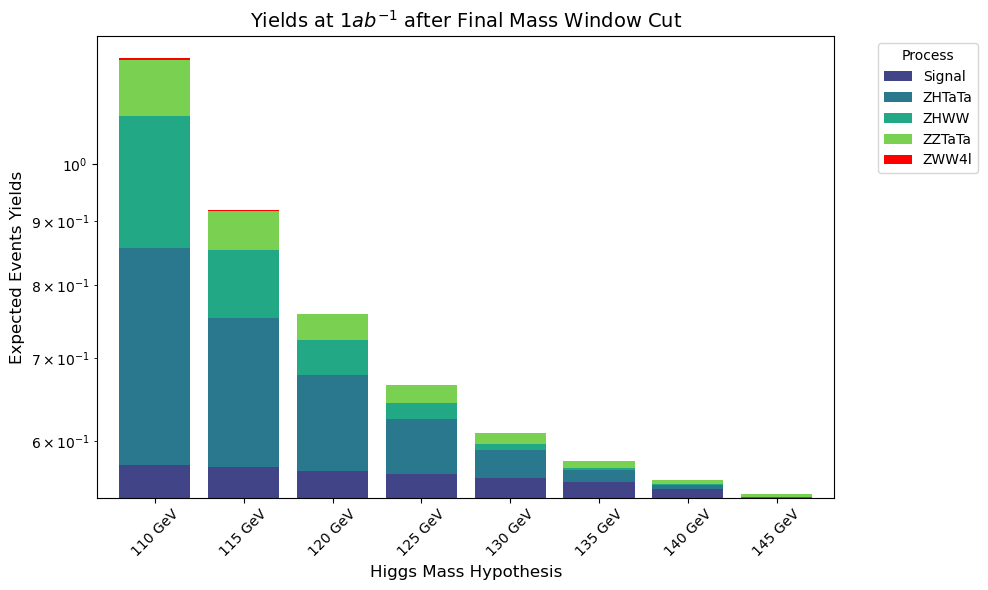

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import awkward as ak

# Initialize a list to collect results for the plot
results_list = []
passed_list = []

# Your calculation loop (updated to store data)
for masspoint in signalType:
    # Extract numerical mass for label
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 30
    
    # Signal Calculation
    signal_mask = (raw_data[masspoint]['Status_08_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    sig_yield = ak.sum(signal_mask) * 1e-6 
    sig_passed = ak.sum(signal_mask)
    
    # Collect signal and mass for this point
    entry = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_yield}
    bg_passed = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_passed}
    
    
    # Background Calculations for this specific mass window
    for bg, xsec in bg_xsec.items():
        bg_mask = (raw_data[bg]['Status_08_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        
        entry[bg] = ak.sum(bg_mask) * xsec
        bg_passed[bg] = ak.sum(bg_mask)
        
    results_list.append(entry)
    passed_list.append(bg_passed)

# 1. Create DataFrame
df_plot = pd.DataFrame(results_list).set_index('MassPoint')

# 2. Plotting
# Use a color palette that distinguishes Signal from Backgrounds
colors = sns.color_palette("viridis", len(bg_xsec)) + [(1, 0, 0)] # Reds for Signal
ax = df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)

# 3. Styling
ax.set_title("Yields at $1 ab^{-1}$ after Final Mass Window Cut", fontsize=14)
ax.set_ylabel("Expected Events Yields", fontsize=12)
ax.set_yscale('log')
ax.set_xlabel("Higgs Mass Hypothesis", fontsize=12)
ax.legend(title="Process", bbox_to_anchor=(1.05, 1), loc='upper left')

# Log scale is highly recommended if Background >> Signal
# ax.set_yscale('log') 

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


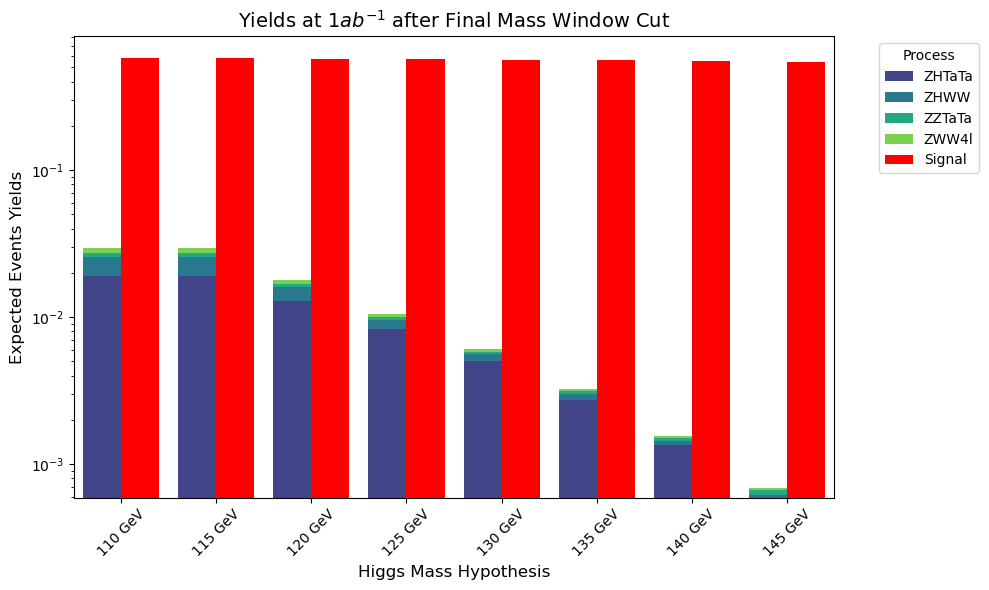

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import awkward as ak

# Initialize a list to collect results for the plot
results_list = []
passed_list = []

# Your calculation loop (updated to store data)
for masspoint in signalType:
    # Extract numerical mass for label
    this_mass = int(masspoint.split('_')[-1][:-3])
    thisMass_windows = 40
    
    # Signal Calculation
    signal_mask = (raw_data[masspoint]['Status_08_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[masspoint]['OtherPair_Mass'] - this_mass) < thisMass_windows)
    sig_yield = ak.sum(signal_mask) * 1e-6 
    sig_passed = ak.sum(signal_mask)
    
    # Collect signal and mass for this point
    entry = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_yield}
    bg_passed = {'MassPoint': f"{this_mass} GeV", 'Signal': sig_passed}
    
    
    # Background Calculations for this specific mass window
    for bg, xsec in bg_xsec.items():
        bg_mask = (raw_data[bg]['Status_08_NotZ_MassThreshold'] == 1) & \
                  (abs(raw_data[bg]['OtherPair_Mass'] - this_mass) < thisMass_windows)
        
        entry[bg] = ak.sum(bg_mask) * 1e-6 #xsec
        bg_passed[bg] = ak.sum(bg_mask)
        
    results_list.append(entry)
    passed_list.append(bg_passed)

# 1. Create DataFrame
df_plot = pd.DataFrame(results_list).set_index('MassPoint')

# 2. SPLIT the DataFrame
# Separate Signal from the Background columns
df_sig = df_plot[['Signal']]            # Only Signal column
df_bg = df_plot.drop(columns=['Signal']) # All other columns (Backgrounds)

# 3. Plotting with "Position" Shift
fig, ax = plt.subplots(figsize=(10, 6))

# A. Plot Stacked Backgrounds (Shifted to the LEFT: position=1)
# We use a distinct palette for backgrounds
bg_colors = sns.color_palette("viridis", len(df_bg.columns))
df_bg.plot(kind='bar', stacked=True, ax=ax, position=1, width=0.4, color=bg_colors)

# B. Plot Signal (Shifted to the RIGHT: position=0)
# We use a bright red for Signal to make it stand out
df_sig.plot(kind='bar', stacked=False, ax=ax, position=0, width=0.4, color=['red'], label='Signal')

# 4. Styling
ax.set_title("Yields at $1 ab^{-1}$ after Final Mass Window Cut", fontsize=14)
ax.set_ylabel("Expected Events Yields", fontsize=12)
ax.set_xlabel("Higgs Mass Hypothesis", fontsize=12)

# Fix the x-axis limits (Pandas 'position' sometimes shifts limits weirdly)
ax.set_xlim(-0.5, len(df_plot) - 0.5)

# Log scale
ax.set_yscale('log')

# Legend management (Combine legends from both plots if needed, or rely on automatic)
# Because we plotted twice, we might want to manually place the legend to avoid clutter
ax.legend(title="Process", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
import pandas as pd
import awkward as ak

# Initialize lists to store data for the table
table_data = []

signalType = [
    "HLFV_110GeV", "HLFV_115GeV", "HLFV_120GeV", "HLFV_125GeV", 
    "HLFV_130GeV", "HLFV_135GeV", "HLFV_140GeV", "HLFV_145GeV",
    'ZHTaTa', 'ZHWW', 'ZZTaTa', 'ZWW4l'
]

# Map cross-sections for background (assuming pb or specific units from your code)
xsec_map = {
    "ZHTaTa": 21.9,
    "ZHWW": 78.4,
    "ZZTaTa": 152.0,
    "ZWW4l": 2.691
}

for key in signalType:
    total_events = len(raw_data[key]['Status_08_NotZ_MassThreshold'])
    passed_events = ak.sum(raw_data[key]['Status_08_NotZ_MassThreshold'])
    # mask_events = raw_data[key]['Status_08_NotZ_MassThreshold'] == 1
    # passed_events = ak.sum(raw_data[key]["OtherPair_Mass"][mask_events]-)
    
    if key in xsec_map:
        # Background: Yield = (Passed / Generated) * Cross-Section * Target_Luminosity
        # Your logic: luminosity = total/xsec -> yield = passed/lumi 
        # This effectively calculates: Passed * (xsec / total)
        luminosity_scaling = total_events / xsec_map[key]
        yield_value = passed_events / luminosity_scaling
    else:
        # Signal: Efficiency (Yield per generated event)
        yield_value = passed_events / total_events

    # Append to list
    table_data.append({
        "Sample Type": key,
        "Total Events": total_events,
        "Passed Events": int(passed_events),
        "Efficiency (%)": (passed_events / total_events) * 100,
        "Yield (1 ab⁻¹)": f"{yield_value:.4e}" if not key.startswith("HLFV") else f"{yield_value:.6f}"
    })

# Create DataFrame
df_yields = pd.DataFrame(table_data)
# Assuming 'df_yields' is the DataFrame from the previous step

# 1. Convert the 'Yield (1 ab⁻¹)' column back to float if it was formatted as strings
df_yields['Yield (1 ab⁻¹)'] = pd.to_numeric(df_yields['Yield (1 ab⁻¹)'])

# 2. Set the display precision and suppress scientific notation
pd.options.display.float_format = '{:.4f}'.format

# 3. If you want to permanently change the values in the DataFrame for export:
df_yields['Yield (1 ab⁻¹)'] = df_yields['Yield (1 ab⁻¹)'].round(4)

# Display the table
# print(df_yields.to_string(index=False))
display(df_yields)

,Sample Type,Total Events,Passed Events,Efficiency (%),Yield (1 ab⁻¹)
0,HLFV_110GeV,1000000,576983,57.6983,0.5770
1,HLFV_115GeV,1000000,575509,57.5509,0.5755
2,HLFV_120GeV,1000000,572547,57.2547,0.5725
3,HLFV_125GeV,1000000,570358,57.0358,0.5704
4,HLFV_130GeV,1000000,568789,56.8789,0.5688
5,HLFV_135GeV,1000000,566312,56.6312,0.5663
6,HLFV_140GeV,1000000,563238,56.3238,0.5632
7,HLFV_145GeV,1000000,559844,55.9844,0.5598
8,ZHTaTa,1000000,18982,1.8982,0.4157
9,ZHWW,999999,6575,0.6575,0.5155


In [79]:
import pandas as pd

def latex_sci_notifier(x):
    # Handle zero exactly as requested
    if x == 0: 
        return "0"
    # Wrap in $ delimiters so Jupyter renders it as a math formula
    return f"{x:.6f}"

# Apply formatting and add a title
styled_table = df_plot.style.format(latex_sci_notifier) \
    .set_caption("Event Yields Around Mass Point") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])

# Display the result
display(styled_table)

,Signal,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
MassPoint,,,,,
110 GeV,0.576983,0.415706,0.515480,0.271928,0.005635
115 GeV,0.575509,0.415706,0.515480,0.271928,0.005635
120 GeV,0.572547,0.415706,0.515480,0.271928,0.005635
125 GeV,0.570358,0.415706,0.515480,0.271928,0.005635
130 GeV,0.568789,0.415706,0.515480,0.271928,0.005635
135 GeV,0.566312,0.415706,0.515480,0.271928,0.005635
140 GeV,0.563238,0.415706,0.515480,0.271928,0.005635
145 GeV,0.559844,0.415706,0.515480,0.271928,0.005635


In [80]:
df_passed = pd.DataFrame(passed_list).set_index('MassPoint')
passed_table = df_passed.style.format() \
    .set_caption("Number of Events Around Mass Point") \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'white'), ('font-size', '16px'), ('font-weight', 'bold')]
    }])
display(passed_table)

,Signal,ZHTaTa,ZHWW,ZZTaTa,ZWW4l
MassPoint,,,,,
110 GeV,576983,18982,6575,1789,2094
115 GeV,575509,18982,6575,1789,2094
120 GeV,572547,18982,6575,1789,2094
125 GeV,570358,18982,6575,1789,2094
130 GeV,568789,18982,6575,1789,2094
135 GeV,566312,18982,6575,1789,2094
140 GeV,563238,18982,6575,1789,2094
145 GeV,559844,18982,6575,1789,2094
